GOAL: This log book will provide **histogram** and **profiles** comparison of images

# Prepare logbook

import statement necessary to get the logbook up and running

In [1]:
from IPython.html import widgets
from IPython.display import display
from IPython.html.widgets import interact

/Users/j35/anaconda/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
import os, os.path

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
from skimage import exposure
import skimage
import numpy as np

In [5]:
from PyQt4 import QtGui
%gui qt

## Select the first working folder

In [6]:
try:
    from PySide import QtCore, QtGui
except ImportError:
    from PyQt4 import QtCore, QtGui

def gui_fname(dir=None):
    """Select a directory
    """
    if dir is None: dir ='./'
    dir_name = QtGui.QFileDialog.getExistingDirectory(None, "Select Folder ...",
                                                  dir,
                                                  QtGui.QFileDialog.ShowDirsOnly)
    return dir_name

In [7]:
%gui qt
data_folder_1 = gui_fname()

## Select the second working folder

In [8]:
%gui qt
data_folder_2 = gui_fname()

In [9]:
class ListOfFilesHandler(object):
    
    list_files = None
    number_files = -1
    
    def __init__(self, folder = None):
        self.folder = folder
        
        self.get_list_files()
        self.get_number_files()
        
    def get_list_files(self):
        self.list_files = [name for name in os.listdir(self.folder) \
                           if os.path.isfile(os.path.join(self.folder, name))]
        
    def get_number_files(self):
        self.number_files = len(self.list_files)


In [10]:
print("\n** INFOS **\n")
print("You are about to compare images from the following two folders:")
print("folder #1: ", data_folder_1)
print("folder #2: ", data_folder_2)
print()
o_list_files_1 = ListOfFilesHandler(folder = data_folder_1)
o_list_files_2 = ListOfFilesHandler(folder = data_folder_2)
print("folder #1 contains %d files" % o_list_files_1.number_files)
print("folder #2 contains %d files" % o_list_files_2.number_files)

list_files_1 = o_list_files_1.list_files
list_files_2 = o_list_files_2.list_files

nbr_files_1 = o_list_files_1.number_files
nbr_files_2 = o_list_files_2.number_files


** INFOS **

You are about to compare images from the following two folders:
folder #1:  /Users/j35/git/users_ipython_notebook/analysis/compare_images_data/data_1
folder #2:  /Users/j35/git/users_ipython_notebook/analysis/compare_images_data/data_2

folder #1 contains 3 files
folder #2 contains 3 files


## Compare histograms

In [11]:
np.set_printoptions(edgeitems=10)

def compare_histograms(index_image_1, index_image_2, max_value_image_1, max_value_image_2):

    image1 = mpimg.imread(os.path.join(data_folder_1, list_files_1[index_image_1]))
    image2 = mpimg.imread(os.path.join(data_folder_2, list_files_2[index_image_2]))
    
    fig = plt.figure(figsize=(30,10))

    ax_img_1 = plt.subplot(1,4,1)
    ax_hist_1 = plt.subplot(1,4,2)
    ax_hist_2 = plt.subplot(1,4,3)
    ax_img_2 = plt.subplot(1,4,4)

    #images

    ax_img_1.imshow(image1, cmap=plt.cm.gray)
    ax_img_1.set_title(list_files_1[index_image_1], fontsize=20)
    
    ax_img_2.imshow(image2, cmap=plt.cm.gray)
    ax_img_2.set_title(list_files_2[index_image_2], fontsize=20)
    
    #histogram
    hist_1 = skimage.exposure.histogram(image1, nbins=256)
    ax_hist_1.plot(hist_1[1], hist_1[0], color="#00aa00")
    ax_hist_1.set_ylim([0, max_value_image_1])
    y_title = "histogram of %s" %list_files_1[index_image_1]
    ax_hist_1.set_title(y_title, fontsize=20)
    ax_hist_1.set_xlabel('Intensity', fontsize=20)
    ax_hist_1.set_ylabel('Counts', fontsize=20)

    hist_2 = skimage.exposure.histogram(image2, nbins=256)
    ax_hist_2.plot(hist_2[1], hist_2[0], color="#00aa00")
    ax_hist_2.set_ylim([0, max_value_image_2])
    y_title = "histogram of %s" %list_files_2[index_image_2]
    ax_hist_2.set_title(y_title, fontsize=20)
    ax_hist_2.set_xlabel('Intensity', fontsize=20)
    ax_hist_2.set_ylabel('Counts', fontsize=20)



In [12]:
max_value1 = mpimg.imread(os.path.join(data_folder_1, list_files_1[0])).max()
max_value2 = mpimg.imread(os.path.join(data_folder_2, list_files_2[0])).max()

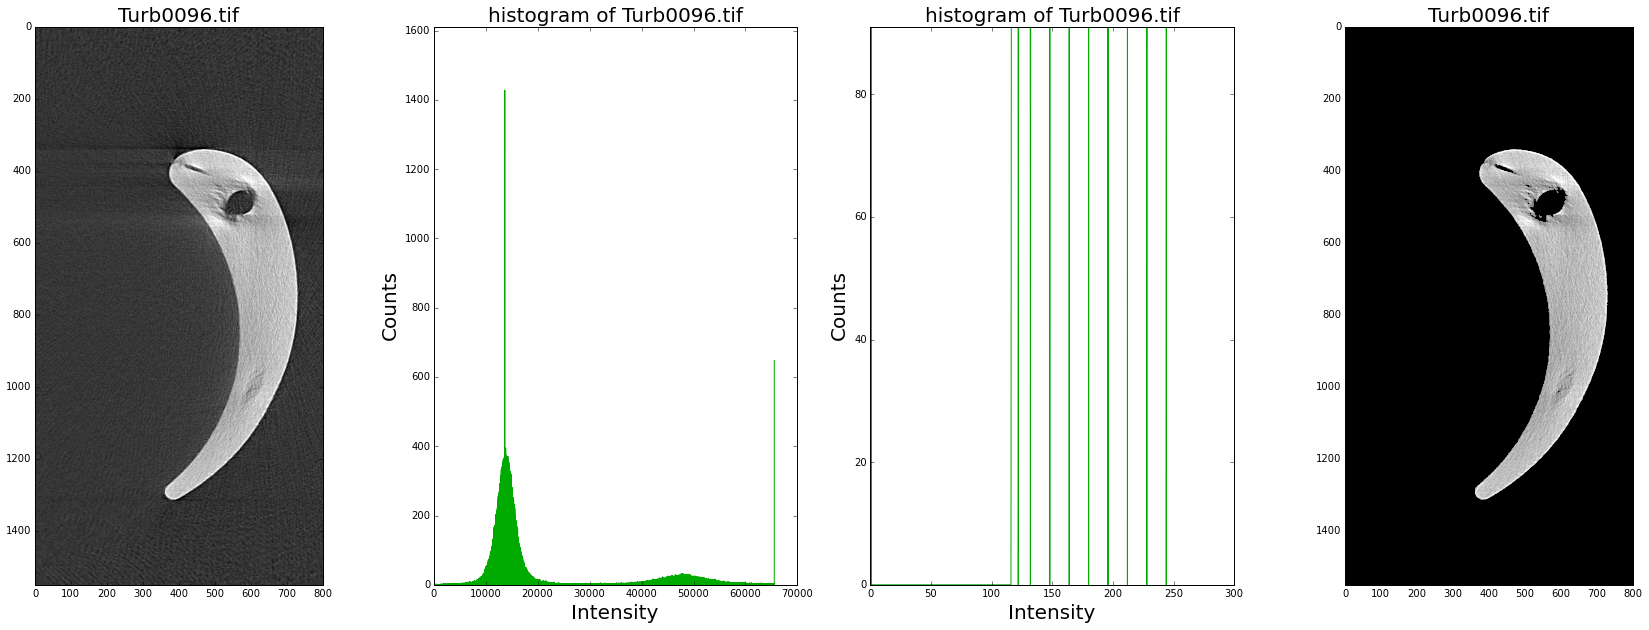

In [14]:
interact(compare_histograms,
        index_image_1 = widgets.IntSlider(min=0, max=nbr_files_1-1, step=1, value=0, description='Index image folder #1'),
        index_image_2 = widgets.IntSlider(min=0, max=nbr_files_2-1, step=1, value=0, description='Index image folder #2'),
        max_value_image_1 = widgets.IntSlider(min=1, max=max_value1, step=10, value=max_value1, description='Max value image folder #1'),
        max_value_image_2 = widgets.IntSlider(min=1, max=max_value2, step=10, value=max_value2, description='Max value image folder #2'))